<a href="https://colab.research.google.com/github/Myemane/datascience/blob/master/dsba6190_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import favorite packages
import pandas as pd
import numpy as np
#visulaisation 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy as sp
import scipy.stats as stats
import sklearn as sk

In [2]:
#reading the dataset 
df_listings = pd.read_excel("full_data_listings.xlsx") 

In [68]:
df_listings.head()

,id,scrape_id,last_scraped,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
60,1879067,20210710190015,2021-07-10,West Asheville - Canie Creek Getaway,313613,Alyson,2010-12-08,"Asheville, North Carolina, United States",within an hour,1.0,1.00,f,Malvern Hills,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,t,"Asheville, North Carolina, United States",28806,35.56677,-82.61641,Entire house,Entire home/apt,3,1 bath,1.0,2.0,90.0,3,31,2,3,31,31,2.6,31.0,t,5,18,39,112,2021-07-10,2,2,2,2021-06-14,2021-07-03,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,1,1,0,2.00
135,5213038,20210710190015,2021-07-10,Strawbridge House,16596642,Barry,2014-06-09,"Asheville, North Carolina, United States",within a day,0.5,0.65,f,Montford Area Historic District,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Asheville, North Carolina, United States",28801,35.60065,-82.55765,Entire house,Entire home/apt,4,1.5 baths,2.0,4.0,180.0,60,1125,60,60,1125,1125,60.0,1125.0,t,0,4,4,164,2021-07-10,319,2,0,2016-09-15,2021-01-31,4.86,4.89,4.88,4.97,4.93,4.94,4.78,f,2,2,0,5.44
148,5917298,20210710190015,2021-07-10,The Tarot House,30728739,Betsy,2015-04-06,"Asheville, North Carolina, United States",within a few hours,1.0,1.00,t,Henrietta- Spears Street,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Asheville, North Carolina, United States",28801,35.60952,-82.55374,Private room in bungalow,Private room,4,1 shared bath,2.0,2.0,60.0,30,1125,30,30,1125,1125,30.0,1125.0,t,0,1,8,283,2021-07-10,195,0,0,2016-07-28,2020-02-16,4.71,4.75,4.64,4.94,4.92,4.84,4.71,f,2,0,2,3.23
186,7556089,20210710190015,2021-07-10,Private Suite in Contemporary West Asheville Home,37942362,Tom,2015-07-08,"Asheville, North Carolina, United States",within an hour,1.0,0.92,t,West Asheville Estates,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Asheville, North Carolina, United States",28806,35.57223,-82.59993,Private room in house,Private room,3,1 private bath,1.0,1.0,83.0,2,3,2,2,3,3,2.0,3.0,t,0,0,0,0,2021-07-10,151,30,2,2017-07-09,2021-06-20,4.91,4.96,4.93,4.99,4.98,4.93,4.86,f,2,0,2,3.10
205,8173732,20210710190015,2021-07-10,DOWNTOWN Asheville Cute 2/1 Great Front Porch ...,32163305,Lisa,2015-04-28,"Asheville, North Carolina, United States",within an hour,1.0,0.93,t,Edgehill,7.0,7.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Asheville, North Carolina, United States",28801,35.60637,-82.54732,Entire bungalow,Entire home/apt,6,1 bath,2.0,2.0,111.0,30,120,30,30,120,120,30.0,120.0,t,1,9,39,129,2021-07-10,31,3,0,2018-05-29,2021-02-16,4.71,4.77,4.58,4.97,5.00,4.86,4.45,t,3,3,0,0.82


In [88]:
final_listing = df_listings[['accommodates', 'bedrooms', 'beds', 'minimum_nights','maximum_nights', 'review_scores_rating','availability_30','review_scores_cleanliness', 
       'availability_60', 'availability_90', 'availability_365','price']]

In [89]:
final_listing.head()

,accommodates,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,availability_30,review_scores_cleanliness,availability_60,availability_90,availability_365,price
60,3,1.0,2.0,3,31,5.00,5,5.00,18,39,112,90.0
135,4,2.0,4.0,60,1125,4.86,0,4.88,4,4,164,180.0
148,4,2.0,2.0,30,1125,4.71,0,4.64,1,8,283,60.0
186,3,1.0,1.0,2,3,4.91,0,4.93,0,0,0,83.0
205,6,2.0,2.0,30,120,4.71,1,4.58,9,39,129,111.0


In [90]:
final_listing.dropna(inplace=True)
final_listing.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


accommodates                 0
bedrooms                     0
beds                         0
minimum_nights               0
maximum_nights               0
review_scores_rating         0
availability_30              0
review_scores_cleanliness    0
availability_60              0
availability_90              0
availability_365             0
price                        0
dtype: int64

In [91]:
#checking for correlation with the target varible 
final_listing.corr()['price']

accommodates                 0.658867
bedrooms                     0.674066
beds                         0.636274
minimum_nights              -0.100216
maximum_nights              -0.020304
review_scores_rating        -0.205086
availability_30              0.016036
review_scores_cleanliness   -0.200162
availability_60              0.030154
availability_90              0.029301
availability_365             0.243853
price                        1.000000
Name: price, dtype: float64

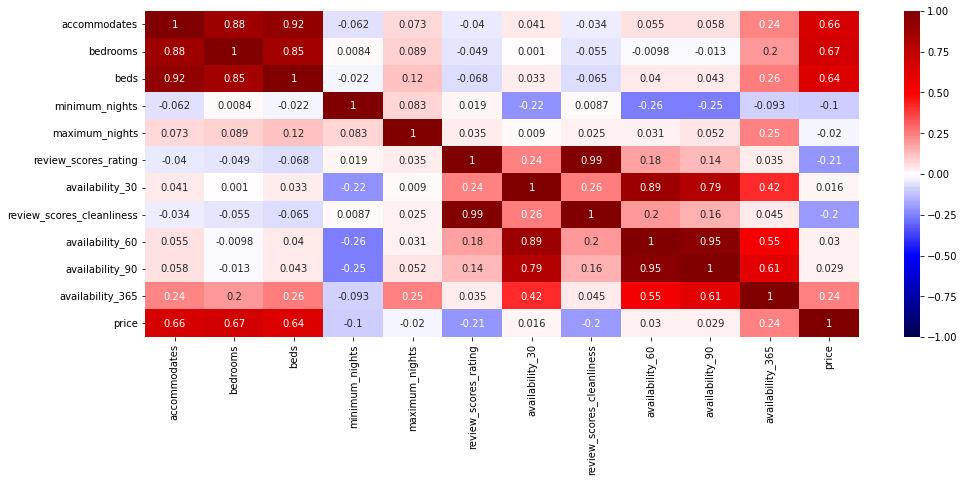

In [92]:
#checking Correlation visually with Seaborn heatmap 
plt.figure(figsize=(16, 6))
sns.heatmap(final_listing.corr(),cmap="seismic", annot=True, vmin=-1,vmax=1)

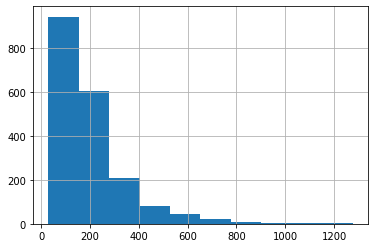

In [93]:
#cheking the distribution of the target variable (NB:- price column is not normally distribute and we will need to log transform it )
final_listing['price'].hist() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Skewness: 0.137534


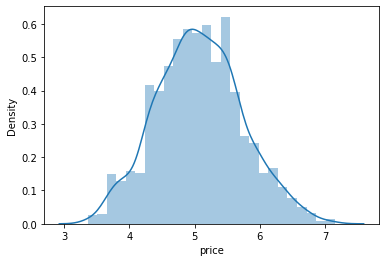

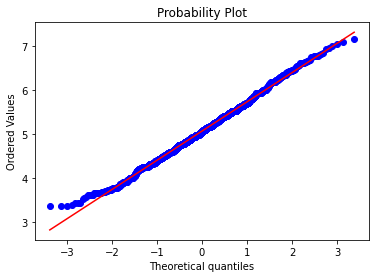

In [94]:
#Log Transformation of Price column and plot it with seaborn 
final_listing['price'] = np.log(final_listing['price'].values)
sns.distplot(final_listing['price'],kde=True,)
fig= plt.figure()
res = stats.probplot(final_listing['price'],plot=plt)
print('Skewness: %f' % final_listing['price'].skew())

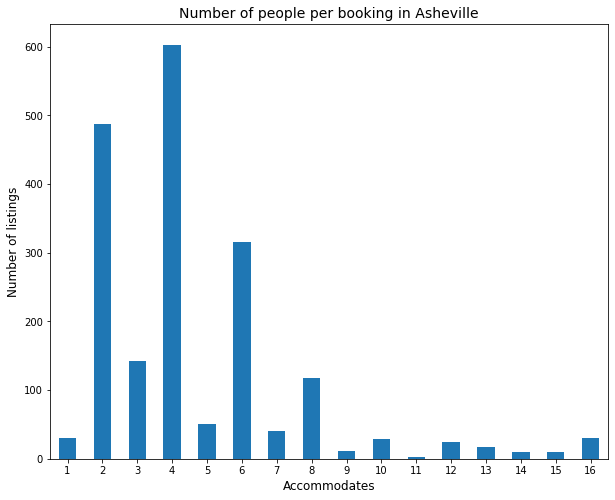

In [95]:
#number of booking per booking  
feq = final_listing['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,8), width=0.5, rot=0)
plt.title('Number of people per booking in Asheville', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

# **Dichotomising the target variable and running classification analysis** 

In [96]:
model = final_listing

In [97]:
#find minimum, maximum and average price for listing
min_price = model['price'].min()
max_price = model['price'].max()
mean_price = model['price'].mean()

print(f'Minimum price per listing is ${min_price}')
print(f'Maximum price per listing is ${max_price}')
print(f'Average price per listing is ${mean_price}')

Minimum price per listing is $3.367295829986474
Maximum price per listing is $7.151485463904735
Average price per listing is $5.0722244382365425


In [99]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#creating classes on price for classification analysis 
model.loc[model['price'] <= 5, 'priceClass'] = 0 # LOW 
model.loc[model['price'] > 5, 'priceClass'] = 1  # HIGH

#model.loc[model.price <= 5, 'priceClass'] = 0
#model.loc[model.price > 5, 'priceClass'] = 1
 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [100]:
model.head()

,accommodates,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,availability_30,review_scores_cleanliness,availability_60,availability_90,availability_365,price,priceClass
60,3,1.0,2.0,3,31,5.00,5,5.00,18,39,112,4.499810,0.0
135,4,2.0,4.0,60,1125,4.86,0,4.88,4,4,164,5.192957,1.0
148,4,2.0,2.0,30,1125,4.71,0,4.64,1,8,283,4.094345,0.0
186,3,1.0,1.0,2,3,4.91,0,4.93,0,0,0,4.418841,0.0
205,6,2.0,2.0,30,120,4.71,1,4.58,9,39,129,4.709530,0.0


In [101]:
 model.drop('price', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


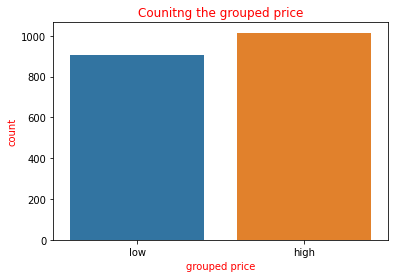

In [103]:
#checking the target catagories distribution 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(model['priceClass'])
plt.xlabel('grouped price', color = 'red')
plt.ylabel('count', color= 'red')
plt.xticks([0.0,1.0], ['low','high'])
plt.title('Counitng the grouped price', COLOR = 'r')
plt.show()

In [104]:
model.head()

,accommodates,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,availability_30,review_scores_cleanliness,availability_60,availability_90,availability_365,priceClass
60,3,1.0,2.0,3,31,5.00,5,5.00,18,39,112,0.0
135,4,2.0,4.0,60,1125,4.86,0,4.88,4,4,164,1.0
148,4,2.0,2.0,30,1125,4.71,0,4.64,1,8,283,0.0
186,3,1.0,1.0,2,3,4.91,0,4.93,0,0,0,0.0
205,6,2.0,2.0,30,120,4.71,1,4.58,9,39,129,0.0


In [105]:
#saving into csv file 
#model.to_csv (r'airbnbPrice.csv', header=True, sep=',', index = False) 

## **CLASSIFICATION Analysis after dichotomised the price column** 

In [106]:
# split in to train and test 
target = model[['priceClass']]
predictor =  model.drop(['priceClass'], axis=1)

In [107]:
# IMPORT MODELS AND UTILITY FUCNTIONS
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

## **Random Forest Classifier model**

In [109]:
# split data into training and test set ( 80 %  train and 20% test) 
X_train, X_test, Y_train, Y_test = train_test_split(predictor, target, test_size = 0.2, stratify = target, random_state = 1)

In [111]:
SEED = 1

rf_model = RandomForestClassifier(max_depth = 25, max_features = 'log2', min_samples_leaf = 1, n_estimators=300, oob_score=True, random_state=SEED)

rf_model.fit(X_train, Y_train)

#predict using best rf model
rf_preds = rf_model.predict(X_test)
print("Accuracy score on Test set: {0:.3f}".format(rf_model.score(X_test, Y_test)))

print("Classification Report Random Forest")
print(classification_report(Y_test, rf_preds))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy score on Test set: 0.875
Classification Report Random Forest
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       182
         1.0       0.92      0.83      0.88       203

    accuracy                           0.88       385
   macro avg       0.88      0.88      0.88       385
weighted avg       0.88      0.88      0.88       385



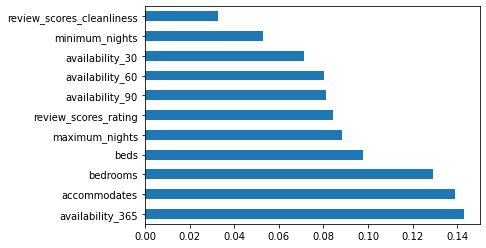

In [113]:
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=predictor.columns)
feature_importances_rf.nlargest(20).plot(kind='barh',)

##**Gradient Boost Classifier model**

In [114]:
# importing GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
gbc_model = GradientBoostingClassifier(n_estimators=200, max_features=10, max_depth = 6, random_state = SEED)

In [116]:
gbc_model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=6, max_features=10, n_estimators=200,
                           random_state=1)

In [117]:
gbc_model_pred = gbc_model.predict(X_test)
print("Accuracy score on Test set: {0:.3f}".format(gbc_model.score(X_test, Y_test)))

Accuracy score on Test set: 0.870


In [118]:
print("Classification Report Gradient Boost")
print(classification_report(Y_test, gbc_model_pred))

Classification Report Gradient Boost
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       182
         1.0       0.91      0.83      0.87       203

    accuracy                           0.87       385
   macro avg       0.87      0.87      0.87       385
weighted avg       0.87      0.87      0.87       385



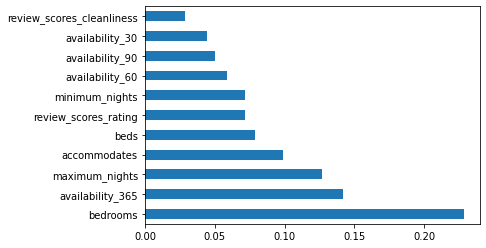

In [120]:
feature_importance_gbc = pd.Series(gbc_model.feature_importances_, index=predictor.columns)
feature_importance_gbc.nlargest(15).plot(kind='barh',)

##**Decision Tree Classifier**

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc

In [122]:
dt = DecisionTreeClassifier(max_depth=12, random_state=SEED)

dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
# accuracy_score(y_test, y_pred)

print("Accuracy score on Test set: {0:.3f}".format(dt.score(X_test, Y_test)))

Accuracy score on Test set: 0.868


In [123]:
print("Classification Report Decision Tree")
print(classification_report(Y_test, Y_pred))

Classification Report Decision Tree
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       182
         1.0       0.87      0.88      0.88       203

    accuracy                           0.87       385
   macro avg       0.87      0.87      0.87       385
weighted avg       0.87      0.87      0.87       385



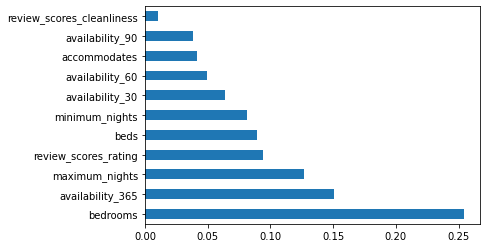

In [124]:
feature_importances_dt = pd.Series(dt.feature_importances_, index=predictor.columns)
feature_importances_dt.nlargest(15).plot(kind='barh',)

## **Ada Boost Classifier model**

In [125]:
# Import Ada Boody Classifier Model
from sklearn.ensemble import AdaBoostClassifier

# Set seed for reproducibility
SEED = 1

# Split data into 80% train and 20% test
###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=SEED)

#Instantiate a classification-tree
dt2 = DecisionTreeClassifier(max_depth=12, random_state=SEED)

#Instantiate an AdaBoost Classifier
adb_clf = AdaBoostClassifier(base_estimator=dt2, n_estimators=100, random_state=SEED)

#Fit the training set to the AdaBoost classifier
adb_clf.fit(X_train, Y_train)

#Predict based on the test set
Y_pred = adb_clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
#Print accuracy results
print("Accuracy score on Test set: {0:.3f}".format(adb_clf.score(X_test, Y_test)))

Accuracy score on Test set: 0.868


In [127]:
print("Classification Report Ada Boost")
print(classification_report(Y_test, Y_pred))

Classification Report Ada Boost
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       182
         1.0       0.90      0.85      0.87       203

    accuracy                           0.87       385
   macro avg       0.87      0.87      0.87       385
weighted avg       0.87      0.87      0.87       385



/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


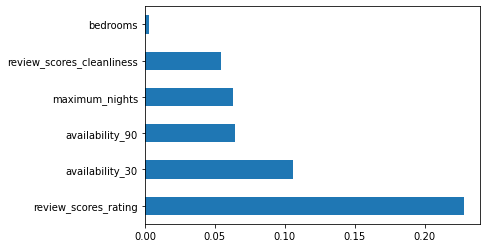

In [128]:
feature_importances_adb = pd.Series(adb_clf.feature_importances_, index=predictor.columns)
feature_importances_adb.nlargest(15).plot(kind='barh',)

##**KNeighbors classifier model**

In [129]:
from sklearn.neighbors import KNeighborsClassifier 

# Set seed for reproducibility
SEED = 1

# instantiate  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

# fit knn to the training data set
knn.fit(X_train,Y_train)

#predict  the test set labels
knn_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [130]:
print("Accuracy score on Test set: {0:.3f}".format(knn.score(X_test, Y_test)))

Accuracy score on Test set: 0.748


In [131]:
print("Classification Report of KNeighbors")
print(classification_report(Y_test, knn_pred))

Classification Report of KNeighbors
              precision    recall  f1-score   support

         0.0       0.69      0.85      0.76       182
         1.0       0.83      0.66      0.73       203

    accuracy                           0.75       385
   macro avg       0.76      0.75      0.75       385
weighted avg       0.76      0.75      0.75       385



## **BaggingClassifier**

In [135]:
# Import BaggingClassifier Model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed for reproducibility
SEED = 1

# Split data into 80% train and 20% test
###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=SEED)

#Instantiate a classification-tree
dt3 = DecisionTreeClassifier(max_depth=12, random_state=SEED)

#Instantiate an AdaBoost Classifier
bag_clf = BaggingClassifier(base_estimator=dt3, n_estimators=100)

#Fit the training set to the AdaBoost classifier
bag_clf.fit(X_train, Y_train)

#Predict based on the test set
Y_pred = bag_clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
#Print accuracy results
print("Accuracy score on Test set: {0:.3f}".format(bag_clf.score(X_test, Y_test)))

Accuracy score on Test set: 0.878


In [136]:
print("Classification Report Bagging")
print(classification_report(Y_test, Y_pred))

Classification Report Bagging
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       182
         1.0       0.92      0.86      0.89       203

    accuracy                           0.88       385
   macro avg       0.88      0.88      0.88       385
weighted avg       0.89      0.88      0.88       385



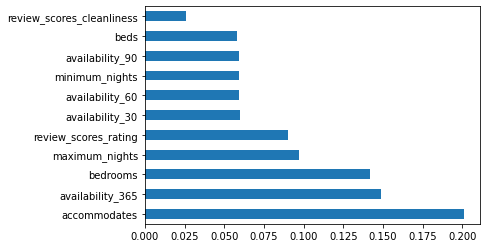

In [137]:
feature_importances_bag = np.mean([
    tree.feature_importances_ for tree in bag_clf.estimators_
], axis=0)

feature_importances_bag = pd.Series(feature_importances_bag, index=predictor.columns)
feature_importances_bag.nlargest(15).plot(kind='barh',)